In [73]:
import warnings
import scanpy as sc
import squidpy as sq
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from urllib import request
import json
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

## Global variables

In [74]:
dir_path = '../../results/'

In [75]:
os.listdir('../../results/filtered_samples/libd')

['151507.h5ad',
 '151508.h5ad',
 '151509.h5ad',
 '151510.h5ad',
 '151669.h5ad',
 '151670.h5ad',
 '151671.h5ad',
 '151672.h5ad',
 '151673.h5ad',
 '151674.h5ad',
 '151675.h5ad',
 '151676.h5ad',
 'spatial_libd_human.h5ad']

In [76]:
# read young human adata object
human_young = sc.read_h5ad(dir_path + 'filtered_samples/human/human.h5ad')
print(human_young)

human_young.obs.label.replace({"L6a": "L6", "L6b": "L6"}, inplace=True)
human_young.obs['condition'] = 'young'
human_young.obs['pb_label'] = human_young.obs.label.astype(str) + '.' + human_young.obs.sample_id.astype(str) + '.' +  human_young.obs['condition']

AnnData object with n_obs × n_vars = 15417 × 19966
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_pct_counts_ribo_colors', 'qc_total_counts_colors', 'spatial'
    obsm: 'spatial'


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [77]:
# read young human adata object
human_old = sc.read_h5ad(dir_path + 'filtered_samples/libd/spatial_libd_human.h5ad')
print(human_old)

human_old.obs['condition'] = 'old'
human_old.obs['pb_label'] = human_old.obs.label.astype(str) + '.' + human_old.obs.sample_id.astype(str) + '.' +  human_old.obs['condition']

AnnData object with n_obs × n_vars = 42588 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'hb', 'ribo'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_pct_counts_mt_colors', 'qc_pct_counts_ribo_colors', 'qc_total_counts_colors', 'spatial'
    obsm: 'spatial'


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [78]:
# concat old and young files
adata = an.concat([human_young, human_old], merge='same',uns_merge="unique")
adata.obs_names_make_unique()
adata

C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 58005 × 19404
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo', 'condition', 'pb_label'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_total_counts_colors', 'spatial', 'qc_pct_counts_mt_colors'
    obsm: 'spatial'

In [79]:
samples = list(adata.uns['spatial'].keys())
samples

['human_759',
 'human_j12',
 'human_j3',
 'human_j4',
 'human_j6',
 '151507',
 '151508',
 '151509',
 '151510',
 '151669',
 '151670',
 '151671',
 '151672',
 '151673',
 '151674',
 '151675',
 '151676']

In [80]:
del human_old, human_young

## Make pseudobulk


In [81]:
pb_list = []
sample_layer_list = adata.obs.pb_label.unique().tolist()
for sample in sample_layer_list:
    pb_list.append(adata[adata.obs.pb_label == sample].X.mean(axis=0))

In [82]:
pb_df = pd.DataFrame(np.concatenate(pb_list).T, columns=sample_layer_list, index=adata.var_names)
pb_df

,WM.human_759.young,L5.human_759.young,L2.human_759.young,L3.human_759.young,L1.human_759.young,L6.human_759.young,L4.human_759.young,WM.human_j12.young,L3.human_j12.young,L4.human_j12.young,...,L2.151675.old,L4.151675.old,L6.151675.old,L3.151676.old,L1.151676.old,WM.151676.old,L6.151676.old,L5.151676.old,L2.151676.old,L4.151676.old
OR4F5,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4F29,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4F16,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SAMD11,0.003876,0.010724,0.002463,0.003883,0.012,0.007339,0.000000,0.006143,0.006158,0.006494,...,0.004202,0.000000,0.007722,0.009132,0.000000,0.015414,0.003328,0.004823,0.004219,0.013158
NOC2L,0.096899,0.201073,0.184729,0.210679,0.074,0.172477,0.205882,0.078498,0.509851,0.616883,...,0.210084,0.205479,0.117761,0.237443,0.132653,0.136801,0.121464,0.173633,0.215190,0.241228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC023491.2,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC233755.2,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC233755.1,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC240274.1,0.000000,0.005362,0.002463,0.005825,0.002,0.003670,0.002262,0.006143,0.022167,0.048701,...,0.008403,0.009132,0.000000,0.001522,0.000000,0.003854,0.000000,0.001608,0.000000,0.004386


In [84]:
columns = ['layer', 'sample_id', 'condition']
annotation_list = [sample.split('.') for sample in sample_layer_list]
annotation = pd.DataFrame(annotation_list, index=sample_layer_list, columns=columns)
annotation

,layer,sample_id,condition
WM.human_759.young,WM,human_759,young
L5.human_759.young,L5,human_759,young
L2.human_759.young,L2,human_759,young
L3.human_759.young,L3,human_759,young
L1.human_759.young,L1,human_759,young
...,...,...,...
WM.151676.old,WM,151676,old
L6.151676.old,L6,151676,old
L5.151676.old,L5,151676,old
L2.151676.old,L2,151676,old


## PCA

In [100]:
pb_adata = an.AnnData(pb_df.T)
pb_adata.obs = annotation
pb_adata

AnnData object with n_obs × n_vars = 111 × 19404
    obs: 'layer', 'sample_id', 'condition'

In [101]:
sc.pp.normalize_total(pb_adata, target_sum=1e4)
sc.pp.log1p(pb_adata)
sc.pp.pca(pb_adata)

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:01)


In [111]:
pb_adata.obs["lib_size"] = pb_adata.X.sum(axis=1)
pb_adata.obs["log_lib_size"] = np.log(pb_adata.obs["lib_size"])

C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


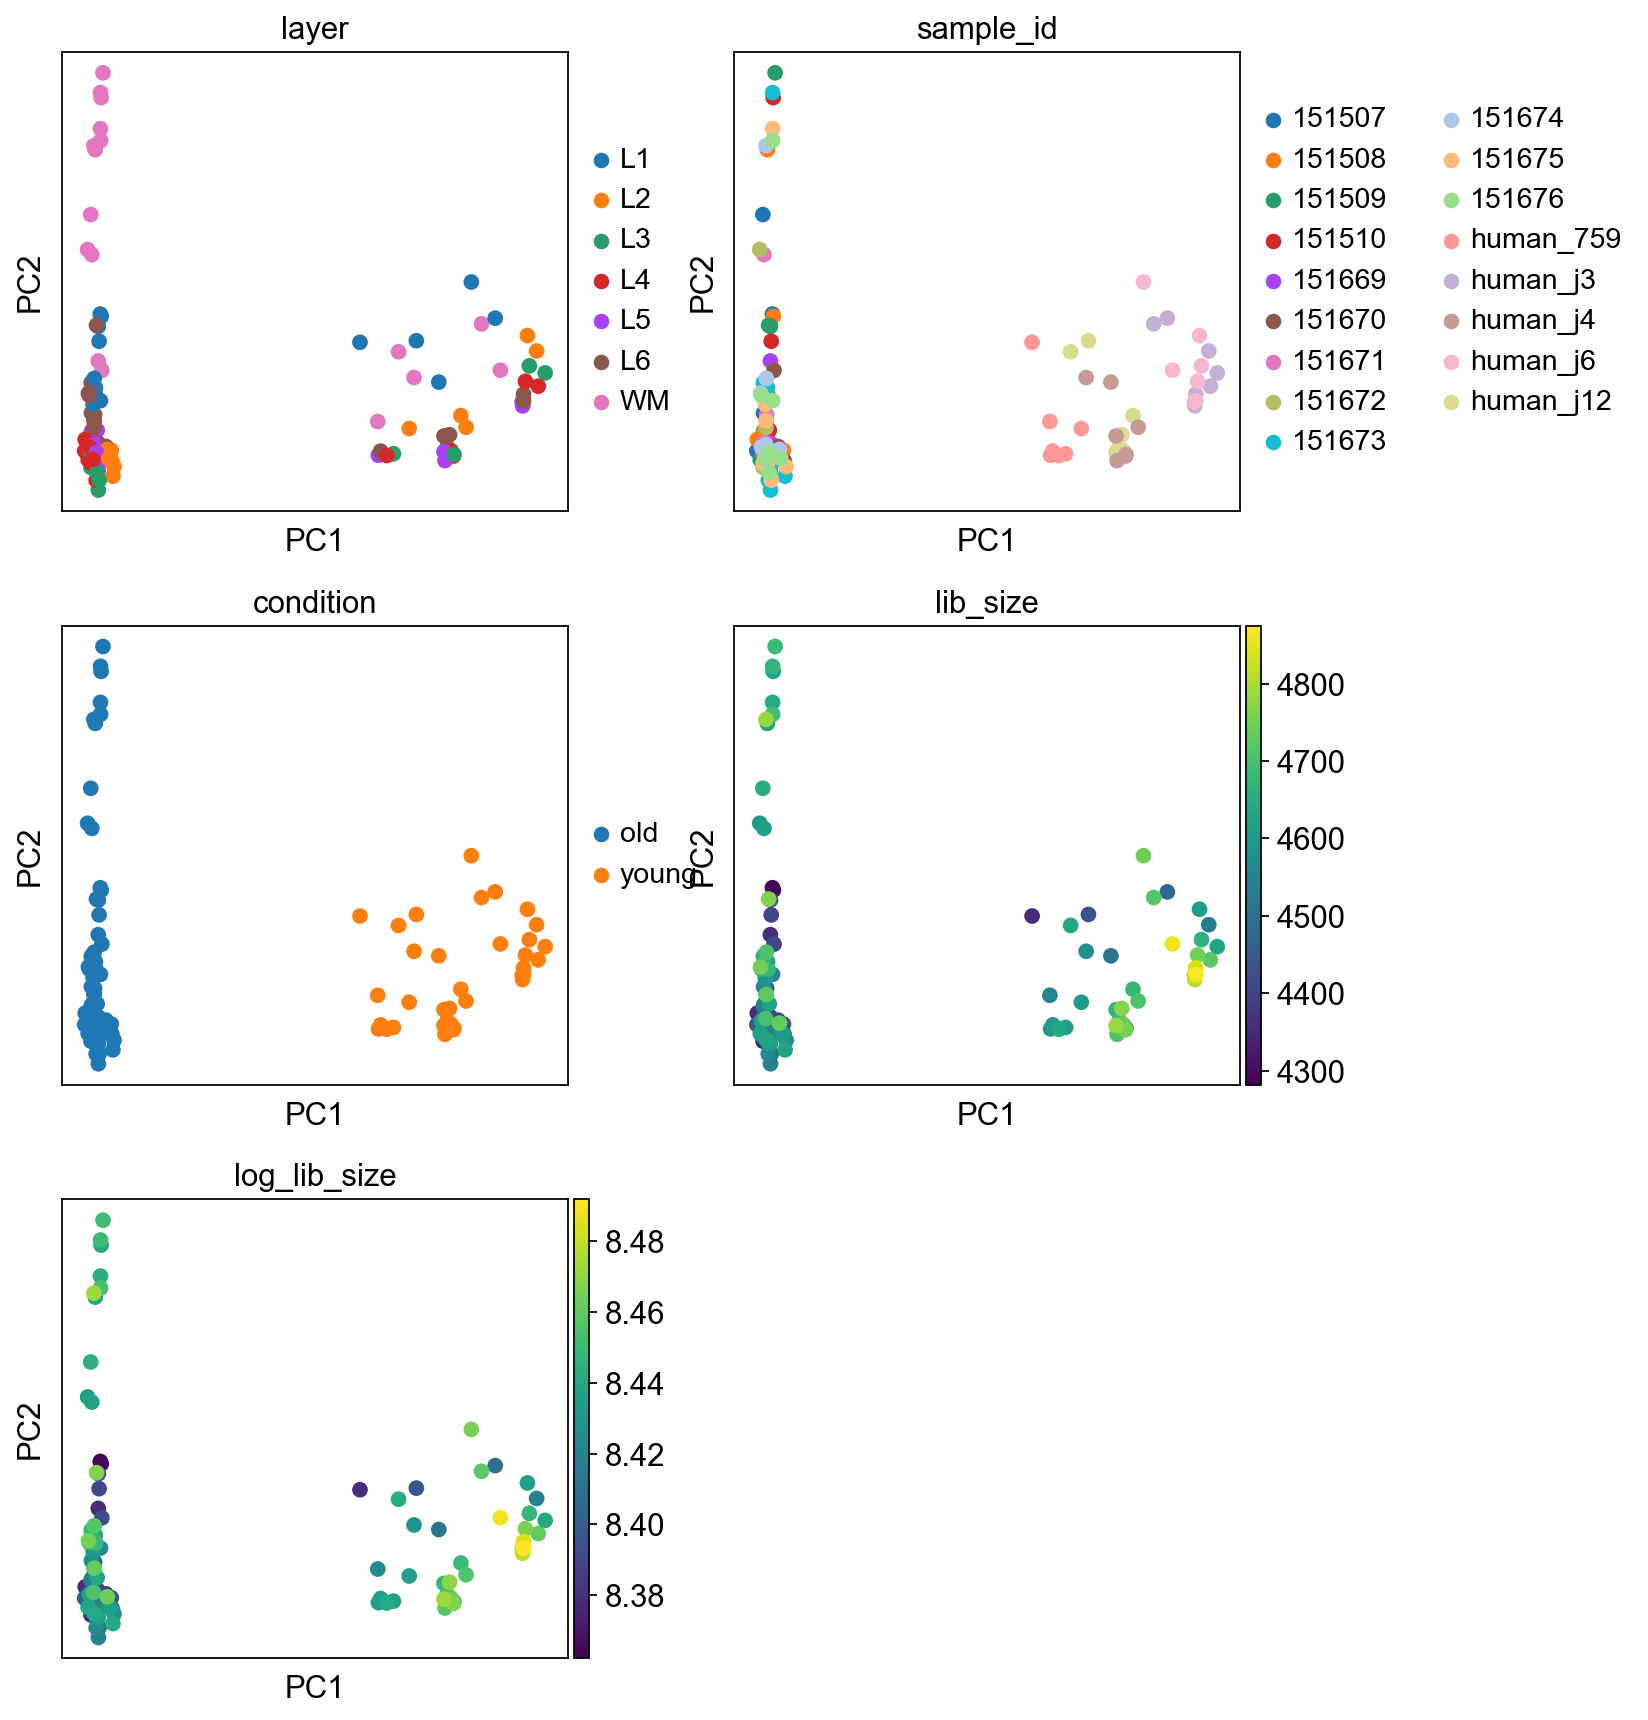

In [113]:
sc.pl.pca(pb_adata, color=pb_adata.obs, size=200, ncols=2)